In [114]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import time


In [115]:
matplotlib.rcParams['text.usetex'] = True


In [116]:
#!/usr/bin/python
import time

# Function that takes a list and sorts using radix sort implementation
def radixsort(toBeSorted, r=10):

    digit = 1
    atTheEnd = False


    while not atTheEnd:
        # Only remains true if we are calculating for the highest significant digit.
        atTheEnd = True

        # Initialize the bins which are a series of lists
        bins = [list() for _ in range(r)]

        # Place items inside toBeSorted buffer into their respective bins
        for i in toBeSorted:
            temp = i / digit
            bins[int(temp % int(r))].append(i)
            if temp > 0:
                atTheEnd = False

        # Put the items in the bins back into the toBeSorted buffer
        toBeSortedIndex = 0
        for i in range(r): # Goes through each bin
            bin = bins[i]
            for j in bin: # Goes through each element in a given bin
                toBeSorted[toBeSortedIndex] = j
                toBeSortedIndex = toBeSortedIndex + 1

        # Increment to sort by the next digit
        digit = digit * r
        
    return toBeSorted



In [117]:
# Python program for implementation of MergeSort 
def mergeSort(arr): 
    if len(arr) >1: 
        mid = len(arr)//2 #Finding the mid of the array 
        L = arr[:mid] # Dividing the array elements  
        R = arr[mid:] # into 2 halves 
  
        mergeSort(L) # Sorting the first half 
        mergeSort(R) # Sorting the second half 
  
        i = j = k = 0
          
        # Copy data to temp arrays L[] and R[] 
        while i < len(L) and j < len(R): 
            if L[i] < R[j]: 
                arr[k] = L[i] 
                i+=1
            else: 
                arr[k] = R[j] 
                j+=1
            k+=1
          
        # Checking if any element was left 
        while i < len(L): 
            arr[k] = L[i] 
            i+=1
            k+=1
          
        while j < len(R): 
            arr[k] = R[j] 
            j+=1
            k+=1

In [118]:
def timeIt(N, large_b=False, merge=False):
    timeList = list()
    for n in N:

        arr = [np.random.randint(0, n) for _ in range(n)]
        arr.append(n)
        
        start = time.time()
        
        if merge:
            mergeSort(arr)
        else:
            if large_b:
                radixsort(arr, int(max(N)))
            else:
                radixsort(arr,2)
            
        end = time.time()
    
        dt = end - start
        timeList.append(dt)
        
    return timeList


## If a list $L=|n|$ contains values in the range $1,2,3,\ldots,n^{c}$, then the runtime of radix sort is $O(d(n+b))$. Here the maximum key $k$ in $L$ is atleast $k\leq n^{c}$. Hence, the maximum possible value that digit $d$ can take is $d=log_{b}(k)=log_{b}(n^{c})$. If $c$ is a constant, then the runtime is $O(n * log_{b}(n))$. Unfortunately, if $b<n$ , this is the same timecomplexity as in the other comparision-sort methods. However, if it's possible to set $b>=n$ (more memory has to be allocated to the sub-routine counting sort since larger list is required), then $O(n)$.

In [131]:
N =list(np.arange(10,60))

In [132]:
TIME1 =list()
for _ in range(50):
    TIME1.append(timeIt(N))

In [133]:
TIME2 =list()
for _ in range(50):
    TIME2.append(timeIt(N,large_b=True))

# Let's see the runtime difference between the conditions $b<n$ and $n \leq b$

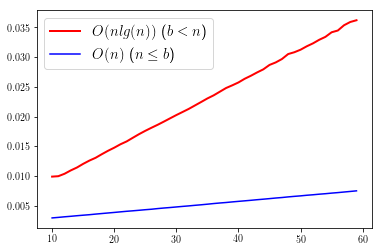

In [139]:
plt.plot(N, np.mean(TIME1,0), "r", label=r'$O(nlg(n))$ ($b<n$)', linewidth=2)
plt.plot(N, np.mean(TIME2,0), "b", label=r'$O(n)$ ($n \leq b$)')
plt.legend(loc='best', fontsize=15)

plt.show()

# Let's check runtime for merge-sort

In [135]:
TIME3 =list()
for _ in range(20):
    TIME3.append(timeIt(N,var_b=True,merge=True))

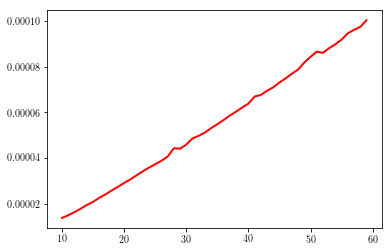

In [136]:
plt.plot(N, np.mean(TIME3,0), "r", label=r'$O(nlg(n))$', linewidth=2)